In [25]:
import pandas as pd
import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [92]:
def EmbeddingRec(char_embedding_size, chars_lenght, num_chars, word_embedding_size):
    poll_2_size = int(word_embedding_size / 2)
    poll_3_size = word_embedding_size - poll_2_size
    
    user_input = keras.Input(shape=(1, chars_lenght), name='user_id')
    # embedding
    emb_applied = layers.Embedding(input_dim=num_chars, output_dim=char_embedding_size, name='user_emb')(user_input)

    flatten = keras.layers.Flatten()(emb_applied)
    reshaped = layers.Reshape((chars_lenght, char_embedding_size, 1))(flatten)

    conv_1 = layers.Conv2D(poll_3_size, kernel_size=(3, char_embedding_size), name="conv_1")(reshaped)
    avg_poll_1 = layers.AveragePooling2D(pool_size=(chars_lenght-2, 1), name="avg_poll_1")(conv_1)
    #conv_1_flatten = layers.Flatten()(conv_1)
    
    conv_2 = layers.Conv2D(poll_2_size, kernel_size=(2, char_embedding_size), name="conv_2")(reshaped)
    avg_poll_2 = layers.AveragePooling2D(pool_size=(chars_lenght-1, 1), name="avg_poll_2")(conv_2)
    #conv_2_flatten = layers.Flatten()(conv_2)
    
    word_embedding = layers.Concatenate()([avg_poll_1, avg_poll_2])
    word_embedding = layers.Flatten()(word_embedding)
    #word_embedding = layers.Dense(word_embedding_size, name="result_embedding")(concat)
    # ========
    
    dense_1 = layers.Dense(8, activation='relu', name='FullyConnected-1')(word_embedding)
    
    dense_2 = layers.Dense(8, activation='relu', name='FullyConnected-2')(dense_1)

    result = layers.Dense(word_embedding_size, name='result')(dense_2)

    adam = keras.optimizers.Adam(lr=0.001)
    model = keras.Model(user_input, result)
    model.compile(optimizer=adam, loss="mse", metrics="mse")
    
    word_model = keras.Model(user_input, word_embedding)
    
    return model, word_model

In [93]:
model, word_model = EmbeddingRec(
    char_embedding_size=10,
    chars_lenght=3,
    num_chars=10,
    word_embedding_size=2
)

In [94]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 user_emb (Embedding)           (None, 1, 3, 10)     100         ['user_id[0][0]']                
                                                                                                  
 flatten_17 (Flatten)           (None, 30)           0           ['user_emb[0][0]']               
                                                                                                  
 reshape_8 (Reshape)            (None, 3, 10, 1)     0           ['flatten_17[0][0]']             
                                                                                            

In [95]:
np.array([[[2, 2, 1]], [[1, 2, 1]]]).shape

(2, 1, 3)

In [96]:
model.predict(np.array([[[2, 2, 1]], [[1, 2, 1]]])).shape

1/1 [==============================] - 0s 52ms/step


(2, 2)

In [97]:
model.predict(np.array([[[2, 2, 1]], [[1, 2, 1]]]))

1/1 [==============================] - 0s 11ms/step


array([[0.00134354, 0.01581654],
       [0.00038383, 0.00989813]], dtype=float32)

In [98]:
word_model.predict(np.array([[[2, 2, 1]], [[1, 2, 1]]])).shape

1/1 [==============================] - 0s 43ms/step


(2, 2)

In [99]:
word_model.predict(np.array([[[2, 2, 1]], [[1, 2, 1]]]))

1/1 [==============================] - 0s 10ms/step


array([[-0.02769051,  0.01503541],
       [-0.01888694,  0.00211648]], dtype=float32)

In [100]:
word_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 user_emb (Embedding)           (None, 1, 3, 10)     100         ['user_id[0][0]']                
                                                                                                  
 flatten_17 (Flatten)           (None, 30)           0           ['user_emb[0][0]']               
                                                                                                  
 reshape_8 (Reshape)            (None, 3, 10, 1)     0           ['flatten_17[0][0]']             
                                                                                            

In [101]:
def int_to_vec(v):
    p = str(v)
#     if len(p) == 3:
#         z = [int(p[0]), int(p[1]), int(p[2])]
    if len(p) == 2:
        z = [0, int(p[0]), int(p[1])]
    if len(p) == 1:
        z = [0, 0, int(p[0])]
    return z

In [102]:
X = []
y = []

for i in range(100):
    z = int_to_vec(i%100)
    X.append(z)
    z = int_to_vec((i+1)%100)
    y.append(z)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [104]:
X_train = np.array(X_train).reshape(len(X_train), 1, 3)
X_test = np.array(X_test).reshape(len(X_test), 1, 3)
y_train = np.array(y_train).reshape(len(y_train), 1, 3)
y_test = np.array(y_test).reshape(len(y_test), 1, 3)

1/1 [==============================] - 0s 15ms/step


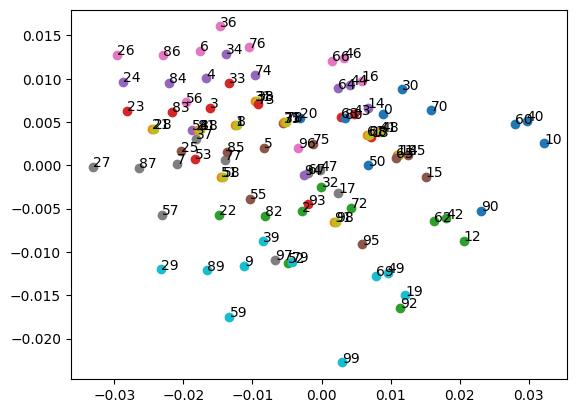

3/3 [==============================] - 0s 38ms/step - loss: 1.5642e-04 - mse: 1.5642e-04 - val_loss: 1.2099e-04 - val_mse: 1.2099e-04
epoch  0
3/3 [==============================] - 0s 14ms/step - loss: 1.1484e-04 - mse: 1.1484e-04 - val_loss: 1.0257e-04 - val_mse: 1.0257e-04
epoch  1
3/3 [==============================] - 0s 14ms/step - loss: 1.0226e-04 - mse: 1.0226e-04 - val_loss: 1.0378e-04 - val_mse: 1.0378e-04
epoch  2
3/3 [==============================] - 0s 14ms/step - loss: 9.9389e-05 - mse: 9.9389e-05 - val_loss: 1.1183e-04 - val_mse: 1.1183e-04
epoch  3
3/3 [==============================] - 0s 14ms/step - loss: 1.0090e-04 - mse: 1.0090e-04 - val_loss: 1.1941e-04 - val_mse: 1.1941e-04
epoch  4
3/3 [==============================] - 0s 15ms/step - loss: 1.0664e-04 - mse: 1.0664e-04 - val_loss: 1.3518e-04 - val_mse: 1.3518e-04
epoch  5
3/3 [==============================] - 0s 15ms/step - loss: 1.1271e-04 - mse: 1.1271e-04 - val_loss: 1.4673e-04 - val_mse: 1.4673e-04
epoch  6

3/3 [==============================] - 0s 14ms/step - loss: 2.5289e-04 - mse: 2.5289e-04 - val_loss: 4.0296e-04 - val_mse: 4.0296e-04
epoch  33
3/3 [==============================] - 0s 14ms/step - loss: 2.2698e-04 - mse: 2.2698e-04 - val_loss: 3.8006e-04 - val_mse: 3.8006e-04
epoch  34
3/3 [==============================] - 0s 14ms/step - loss: 2.1010e-04 - mse: 2.1010e-04 - val_loss: 3.5520e-04 - val_mse: 3.5520e-04
epoch  35
3/3 [==============================] - 0s 14ms/step - loss: 1.9535e-04 - mse: 1.9535e-04 - val_loss: 3.5471e-04 - val_mse: 3.5471e-04
epoch  36
3/3 [==============================] - 0s 14ms/step - loss: 1.9803e-04 - mse: 1.9803e-04 - val_loss: 3.4562e-04 - val_mse: 3.4562e-04
epoch  37
3/3 [==============================] - 0s 14ms/step - loss: 2.1158e-04 - mse: 2.1158e-04 - val_loss: 3.5108e-04 - val_mse: 3.5108e-04
epoch  38
3/3 [==============================] - 0s 15ms/step - loss: 2.1737e-04 - mse: 2.1737e-04 - val_loss: 3.4900e-04 - val_mse: 3.4900e-04
ep

1/1 [==============================] - 0s 13ms/step


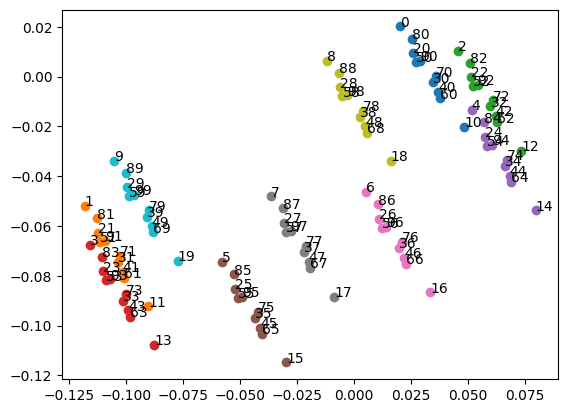

3/3 [==============================] - 0s 14ms/step - loss: 2.3757e-04 - mse: 2.3757e-04 - val_loss: 3.0685e-04 - val_mse: 3.0685e-04
epoch  50
3/3 [==============================] - 0s 14ms/step - loss: 2.7271e-04 - mse: 2.7271e-04 - val_loss: 3.3600e-04 - val_mse: 3.3600e-04
epoch  51
3/3 [==============================] - 0s 14ms/step - loss: 2.4375e-04 - mse: 2.4375e-04 - val_loss: 3.3808e-04 - val_mse: 3.3808e-04
epoch  52
3/3 [==============================] - 0s 14ms/step - loss: 2.7514e-04 - mse: 2.7514e-04 - val_loss: 3.4866e-04 - val_mse: 3.4866e-04
epoch  53
3/3 [==============================] - 0s 14ms/step - loss: 2.5585e-04 - mse: 2.5585e-04 - val_loss: 3.4760e-04 - val_mse: 3.4760e-04
epoch  54
3/3 [==============================] - 0s 14ms/step - loss: 2.9983e-04 - mse: 2.9983e-04 - val_loss: 3.5214e-04 - val_mse: 3.5214e-04
epoch  55
3/3 [==============================] - 0s 14ms/step - loss: 2.8543e-04 - mse: 2.8543e-04 - val_loss: 3.6328e-04 - val_mse: 3.6328e-04
ep

3/3 [==============================] - 0s 14ms/step - loss: 5.3680e-04 - mse: 5.3680e-04 - val_loss: 7.5213e-04 - val_mse: 7.5213e-04
epoch  83
3/3 [==============================] - 0s 15ms/step - loss: 5.8030e-04 - mse: 5.8030e-04 - val_loss: 8.1592e-04 - val_mse: 8.1592e-04
epoch  84
3/3 [==============================] - 0s 15ms/step - loss: 5.9137e-04 - mse: 5.9137e-04 - val_loss: 8.2848e-04 - val_mse: 8.2848e-04
epoch  85
3/3 [==============================] - 0s 13ms/step - loss: 6.0688e-04 - mse: 6.0688e-04 - val_loss: 8.3890e-04 - val_mse: 8.3890e-04
epoch  86
3/3 [==============================] - 0s 14ms/step - loss: 6.2600e-04 - mse: 6.2600e-04 - val_loss: 8.9277e-04 - val_mse: 8.9277e-04
epoch  87
3/3 [==============================] - 0s 13ms/step - loss: 6.2605e-04 - mse: 6.2605e-04 - val_loss: 8.6310e-04 - val_mse: 8.6310e-04
epoch  88
3/3 [==============================] - 0s 14ms/step - loss: 5.8565e-04 - mse: 5.8565e-04 - val_loss: 7.6554e-04 - val_mse: 7.6554e-04
ep

1/1 [==============================] - 0s 13ms/step


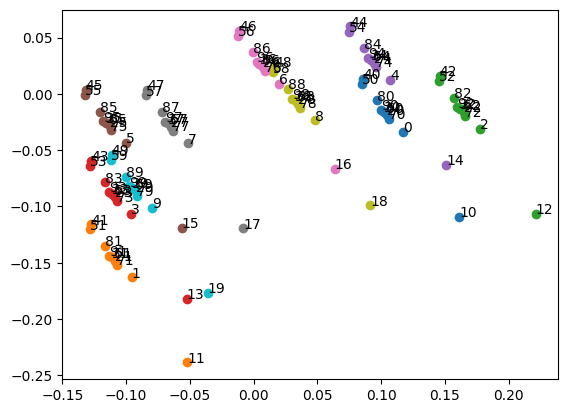

3/3 [==============================] - 0s 13ms/step - loss: 4.5408e-04 - mse: 4.5408e-04 - val_loss: 5.7473e-04 - val_mse: 5.7473e-04
epoch  100
3/3 [==============================] - 0s 13ms/step - loss: 4.6077e-04 - mse: 4.6077e-04 - val_loss: 5.6510e-04 - val_mse: 5.6510e-04
epoch  101
3/3 [==============================] - 0s 14ms/step - loss: 4.5391e-04 - mse: 4.5391e-04 - val_loss: 5.3757e-04 - val_mse: 5.3757e-04
epoch  102
3/3 [==============================] - 0s 13ms/step - loss: 4.6365e-04 - mse: 4.6365e-04 - val_loss: 5.2604e-04 - val_mse: 5.2604e-04
epoch  103
3/3 [==============================] - 0s 13ms/step - loss: 4.6162e-04 - mse: 4.6162e-04 - val_loss: 5.5495e-04 - val_mse: 5.5495e-04
epoch  104
3/3 [==============================] - 0s 14ms/step - loss: 4.6976e-04 - mse: 4.6976e-04 - val_loss: 5.9200e-04 - val_mse: 5.9200e-04
epoch  105
3/3 [==============================] - 0s 14ms/step - loss: 4.7104e-04 - mse: 4.7104e-04 - val_loss: 6.1715e-04 - val_mse: 6.1715e

epoch  132
3/3 [==============================] - 0s 14ms/step - loss: 2.3492e-04 - mse: 2.3492e-04 - val_loss: 3.3000e-04 - val_mse: 3.3000e-04
epoch  133
3/3 [==============================] - 0s 13ms/step - loss: 2.3186e-04 - mse: 2.3186e-04 - val_loss: 3.1139e-04 - val_mse: 3.1139e-04
epoch  134
3/3 [==============================] - 0s 14ms/step - loss: 2.2410e-04 - mse: 2.2410e-04 - val_loss: 3.0947e-04 - val_mse: 3.0947e-04
epoch  135
3/3 [==============================] - 0s 13ms/step - loss: 2.2195e-04 - mse: 2.2195e-04 - val_loss: 3.0706e-04 - val_mse: 3.0706e-04
epoch  136
3/3 [==============================] - 0s 14ms/step - loss: 2.2152e-04 - mse: 2.2152e-04 - val_loss: 3.0069e-04 - val_mse: 3.0069e-04
epoch  137
3/3 [==============================] - 0s 14ms/step - loss: 2.1675e-04 - mse: 2.1675e-04 - val_loss: 2.9606e-04 - val_mse: 2.9606e-04
epoch  138
3/3 [==============================] - 0s 13ms/step - loss: 2.1704e-04 - mse: 2.1704e-04 - val_loss: 2.8445e-04 - val_m

1/1 [==============================] - 0s 13ms/step


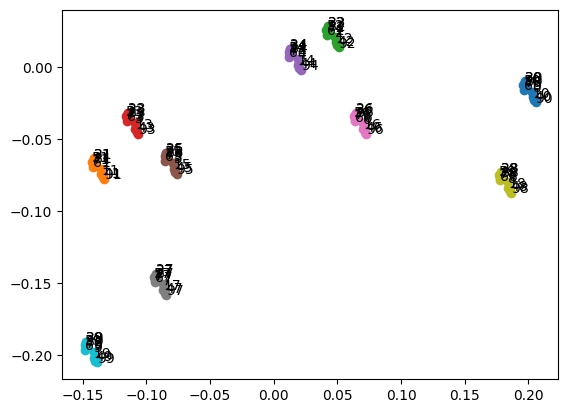

3/3 [==============================] - 0s 14ms/step - loss: 2.2973e-04 - mse: 2.2973e-04 - val_loss: 2.5535e-04 - val_mse: 2.5535e-04
epoch  150
3/3 [==============================] - 0s 14ms/step - loss: 2.2888e-04 - mse: 2.2888e-04 - val_loss: 2.5503e-04 - val_mse: 2.5503e-04
epoch  151
3/3 [==============================] - 0s 15ms/step - loss: 2.3014e-04 - mse: 2.3014e-04 - val_loss: 2.4860e-04 - val_mse: 2.4860e-04
epoch  152
3/3 [==============================] - 0s 14ms/step - loss: 2.3445e-04 - mse: 2.3445e-04 - val_loss: 2.4325e-04 - val_mse: 2.4325e-04
epoch  153
3/3 [==============================] - 0s 14ms/step - loss: 2.4267e-04 - mse: 2.4267e-04 - val_loss: 2.3963e-04 - val_mse: 2.3963e-04
epoch  154
3/3 [==============================] - 0s 13ms/step - loss: 2.4541e-04 - mse: 2.4541e-04 - val_loss: 2.5317e-04 - val_mse: 2.5317e-04
epoch  155
3/3 [==============================] - 0s 13ms/step - loss: 2.5154e-04 - mse: 2.5154e-04 - val_loss: 2.7916e-04 - val_mse: 2.7916e

epoch  182
3/3 [==============================] - 0s 14ms/step - loss: 1.5497e-04 - mse: 1.5497e-04 - val_loss: 2.5511e-04 - val_mse: 2.5511e-04
epoch  183
3/3 [==============================] - 0s 14ms/step - loss: 1.4902e-04 - mse: 1.4902e-04 - val_loss: 2.5871e-04 - val_mse: 2.5871e-04
epoch  184
3/3 [==============================] - 0s 14ms/step - loss: 1.5458e-04 - mse: 1.5458e-04 - val_loss: 2.6740e-04 - val_mse: 2.6740e-04
epoch  185
3/3 [==============================] - 0s 15ms/step - loss: 1.4620e-04 - mse: 1.4620e-04 - val_loss: 2.4866e-04 - val_mse: 2.4866e-04
epoch  186
3/3 [==============================] - 0s 14ms/step - loss: 1.4286e-04 - mse: 1.4286e-04 - val_loss: 2.2891e-04 - val_mse: 2.2891e-04
epoch  187
3/3 [==============================] - 0s 14ms/step - loss: 1.3875e-04 - mse: 1.3875e-04 - val_loss: 2.2418e-04 - val_mse: 2.2418e-04
epoch  188
3/3 [==============================] - 0s 15ms/step - loss: 1.3430e-04 - mse: 1.3430e-04 - val_loss: 2.0998e-04 - val_m

1/1 [==============================] - 0s 14ms/step


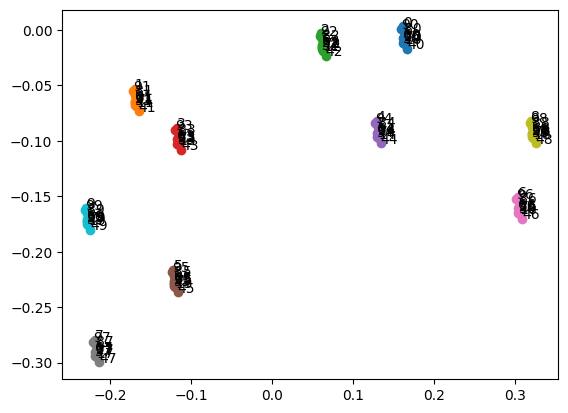

3/3 [==============================] - 0s 14ms/step - loss: 8.5423e-05 - mse: 8.5423e-05 - val_loss: 1.1943e-04 - val_mse: 1.1943e-04
epoch  200
3/3 [==============================] - 0s 14ms/step - loss: 8.2135e-05 - mse: 8.2135e-05 - val_loss: 1.0445e-04 - val_mse: 1.0445e-04
epoch  201
3/3 [==============================] - 0s 14ms/step - loss: 7.9877e-05 - mse: 7.9877e-05 - val_loss: 1.0449e-04 - val_mse: 1.0449e-04
epoch  202
3/3 [==============================] - 0s 14ms/step - loss: 7.3708e-05 - mse: 7.3708e-05 - val_loss: 1.0323e-04 - val_mse: 1.0323e-04
epoch  203
3/3 [==============================] - 0s 14ms/step - loss: 7.6608e-05 - mse: 7.6608e-05 - val_loss: 9.4245e-05 - val_mse: 9.4245e-05
epoch  204
3/3 [==============================] - 0s 16ms/step - loss: 7.1014e-05 - mse: 7.1014e-05 - val_loss: 8.8474e-05 - val_mse: 8.8474e-05
epoch  205
3/3 [==============================] - 0s 13ms/step - loss: 6.3851e-05 - mse: 6.3851e-05 - val_loss: 7.9579e-05 - val_mse: 7.9579e

epoch  232
3/3 [==============================] - 0s 14ms/step - loss: 2.3624e-05 - mse: 2.3624e-05 - val_loss: 3.3514e-05 - val_mse: 3.3514e-05
epoch  233
3/3 [==============================] - 0s 14ms/step - loss: 2.4041e-05 - mse: 2.4041e-05 - val_loss: 3.3264e-05 - val_mse: 3.3264e-05
epoch  234
3/3 [==============================] - 0s 84ms/step - loss: 2.3988e-05 - mse: 2.3988e-05 - val_loss: 3.1349e-05 - val_mse: 3.1349e-05
epoch  235
3/3 [==============================] - 0s 13ms/step - loss: 2.3909e-05 - mse: 2.3909e-05 - val_loss: 3.3202e-05 - val_mse: 3.3202e-05
epoch  236
3/3 [==============================] - 0s 14ms/step - loss: 2.4133e-05 - mse: 2.4133e-05 - val_loss: 3.7747e-05 - val_mse: 3.7747e-05
epoch  237
3/3 [==============================] - 0s 14ms/step - loss: 2.5046e-05 - mse: 2.5046e-05 - val_loss: 3.7167e-05 - val_mse: 3.7167e-05
epoch  238
3/3 [==============================] - 0s 14ms/step - loss: 2.5176e-05 - mse: 2.5176e-05 - val_loss: 3.8488e-05 - val_m

1/1 [==============================] - 0s 14ms/step


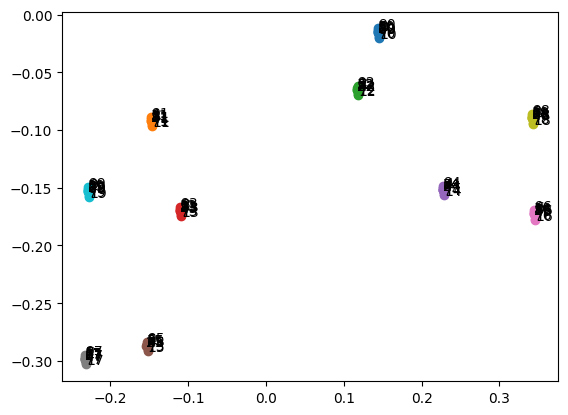

3/3 [==============================] - 0s 13ms/step - loss: 2.0254e-05 - mse: 2.0254e-05 - val_loss: 2.3658e-05 - val_mse: 2.3658e-05
epoch  250
3/3 [==============================] - 0s 13ms/step - loss: 2.0517e-05 - mse: 2.0517e-05 - val_loss: 2.1854e-05 - val_mse: 2.1854e-05
epoch  251
3/3 [==============================] - 0s 13ms/step - loss: 2.0316e-05 - mse: 2.0316e-05 - val_loss: 2.2065e-05 - val_mse: 2.2065e-05
epoch  252
3/3 [==============================] - 0s 14ms/step - loss: 2.0010e-05 - mse: 2.0010e-05 - val_loss: 1.8624e-05 - val_mse: 1.8624e-05
epoch  253
3/3 [==============================] - 0s 13ms/step - loss: 2.1911e-05 - mse: 2.1911e-05 - val_loss: 2.0275e-05 - val_mse: 2.0275e-05
epoch  254
3/3 [==============================] - 0s 13ms/step - loss: 2.1874e-05 - mse: 2.1874e-05 - val_loss: 2.4927e-05 - val_mse: 2.4927e-05
epoch  255
3/3 [==============================] - 0s 84ms/step - loss: 2.3485e-05 - mse: 2.3485e-05 - val_loss: 2.1319e-05 - val_mse: 2.1319e

epoch  282
3/3 [==============================] - 0s 13ms/step - loss: 4.5277e-05 - mse: 4.5277e-05 - val_loss: 3.8105e-05 - val_mse: 3.8105e-05
epoch  283
3/3 [==============================] - 0s 13ms/step - loss: 4.7467e-05 - mse: 4.7467e-05 - val_loss: 3.6510e-05 - val_mse: 3.6510e-05
epoch  284
3/3 [==============================] - 0s 14ms/step - loss: 4.8926e-05 - mse: 4.8926e-05 - val_loss: 3.3585e-05 - val_mse: 3.3585e-05
epoch  285
3/3 [==============================] - 0s 14ms/step - loss: 4.8627e-05 - mse: 4.8627e-05 - val_loss: 3.7985e-05 - val_mse: 3.7985e-05
epoch  286
3/3 [==============================] - 0s 13ms/step - loss: 4.7894e-05 - mse: 4.7894e-05 - val_loss: 4.4464e-05 - val_mse: 4.4464e-05
epoch  287
3/3 [==============================] - 0s 13ms/step - loss: 5.0458e-05 - mse: 5.0458e-05 - val_loss: 4.2959e-05 - val_mse: 4.2959e-05
epoch  288
3/3 [==============================] - 0s 14ms/step - loss: 5.1023e-05 - mse: 5.1023e-05 - val_loss: 4.7018e-05 - val_m

1/1 [==============================] - 0s 13ms/step


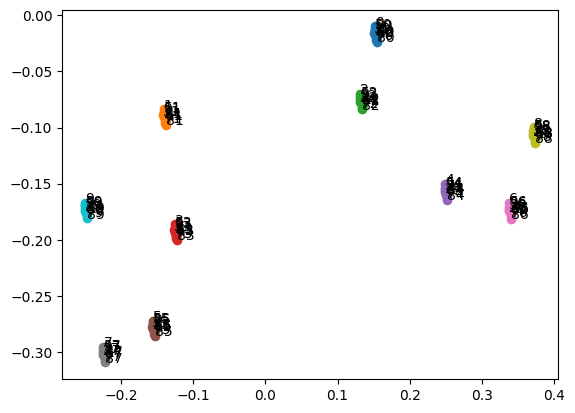

3/3 [==============================] - 0s 13ms/step - loss: 8.0215e-05 - mse: 8.0215e-05 - val_loss: 1.1915e-04 - val_mse: 1.1915e-04
epoch  300
3/3 [==============================] - 0s 13ms/step - loss: 8.4731e-05 - mse: 8.4731e-05 - val_loss: 1.2611e-04 - val_mse: 1.2611e-04
epoch  301
3/3 [==============================] - 0s 13ms/step - loss: 8.1535e-05 - mse: 8.1535e-05 - val_loss: 1.1609e-04 - val_mse: 1.1609e-04
epoch  302
3/3 [==============================] - 0s 13ms/step - loss: 8.5607e-05 - mse: 8.5607e-05 - val_loss: 1.1351e-04 - val_mse: 1.1351e-04
epoch  303
3/3 [==============================] - 0s 13ms/step - loss: 8.2741e-05 - mse: 8.2741e-05 - val_loss: 1.0263e-04 - val_mse: 1.0263e-04
epoch  304
3/3 [==============================] - 0s 13ms/step - loss: 7.8072e-05 - mse: 7.8072e-05 - val_loss: 9.5402e-05 - val_mse: 9.5402e-05
epoch  305
3/3 [==============================] - 0s 13ms/step - loss: 8.5690e-05 - mse: 8.5690e-05 - val_loss: 8.9837e-05 - val_mse: 8.9837e

epoch  332
3/3 [==============================] - 0s 14ms/step - loss: 1.9049e-04 - mse: 1.9049e-04 - val_loss: 3.2061e-04 - val_mse: 3.2061e-04
epoch  333
3/3 [==============================] - 0s 13ms/step - loss: 1.8262e-04 - mse: 1.8262e-04 - val_loss: 2.8328e-04 - val_mse: 2.8328e-04
epoch  334
3/3 [==============================] - 0s 14ms/step - loss: 1.8464e-04 - mse: 1.8464e-04 - val_loss: 2.8427e-04 - val_mse: 2.8427e-04
epoch  335
3/3 [==============================] - 0s 14ms/step - loss: 1.8924e-04 - mse: 1.8924e-04 - val_loss: 2.6469e-04 - val_mse: 2.6469e-04
epoch  336
3/3 [==============================] - 0s 14ms/step - loss: 1.9721e-04 - mse: 1.9721e-04 - val_loss: 2.8836e-04 - val_mse: 2.8836e-04
epoch  337
3/3 [==============================] - 0s 14ms/step - loss: 2.0279e-04 - mse: 2.0279e-04 - val_loss: 2.9399e-04 - val_mse: 2.9399e-04
epoch  338
3/3 [==============================] - 0s 13ms/step - loss: 2.1583e-04 - mse: 2.1583e-04 - val_loss: 2.8282e-04 - val_m

1/1 [==============================] - 0s 13ms/step


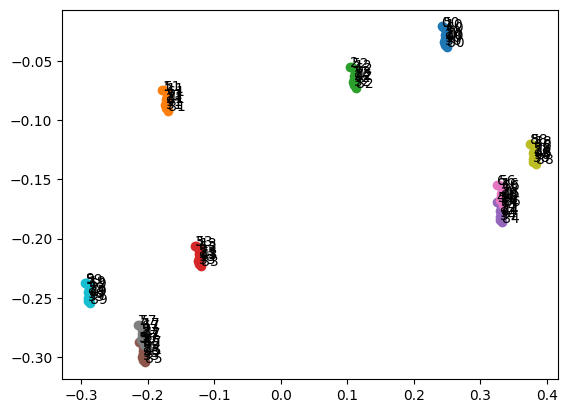

3/3 [==============================] - 0s 13ms/step - loss: 3.7379e-04 - mse: 3.7379e-04 - val_loss: 3.4312e-04 - val_mse: 3.4312e-04
epoch  350
3/3 [==============================] - 0s 13ms/step - loss: 3.7219e-04 - mse: 3.7219e-04 - val_loss: 3.5817e-04 - val_mse: 3.5817e-04
epoch  351
3/3 [==============================] - 0s 13ms/step - loss: 3.7800e-04 - mse: 3.7800e-04 - val_loss: 4.0356e-04 - val_mse: 4.0356e-04
epoch  352
3/3 [==============================] - 0s 14ms/step - loss: 3.9569e-04 - mse: 3.9569e-04 - val_loss: 4.2891e-04 - val_mse: 4.2891e-04
epoch  353
3/3 [==============================] - 0s 13ms/step - loss: 4.1646e-04 - mse: 4.1646e-04 - val_loss: 4.4380e-04 - val_mse: 4.4380e-04
epoch  354
3/3 [==============================] - 0s 14ms/step - loss: 4.3367e-04 - mse: 4.3367e-04 - val_loss: 4.6044e-04 - val_mse: 4.6044e-04
epoch  355
3/3 [==============================] - 0s 13ms/step - loss: 4.4425e-04 - mse: 4.4425e-04 - val_loss: 4.9563e-04 - val_mse: 4.9563e

epoch  382
3/3 [==============================] - 0s 14ms/step - loss: 8.2043e-04 - mse: 8.2043e-04 - val_loss: 5.9995e-04 - val_mse: 5.9995e-04
epoch  383
3/3 [==============================] - 0s 14ms/step - loss: 8.3393e-04 - mse: 8.3393e-04 - val_loss: 6.4539e-04 - val_mse: 6.4539e-04
epoch  384
3/3 [==============================] - 0s 13ms/step - loss: 8.0714e-04 - mse: 8.0714e-04 - val_loss: 7.4527e-04 - val_mse: 7.4527e-04
epoch  385
3/3 [==============================] - 0s 15ms/step - loss: 7.9871e-04 - mse: 7.9871e-04 - val_loss: 6.7201e-04 - val_mse: 6.7201e-04
epoch  386
3/3 [==============================] - 0s 14ms/step - loss: 8.2030e-04 - mse: 8.2030e-04 - val_loss: 6.1538e-04 - val_mse: 6.1538e-04
epoch  387
3/3 [==============================] - 0s 13ms/step - loss: 9.0722e-04 - mse: 9.0722e-04 - val_loss: 6.6888e-04 - val_mse: 6.6888e-04
epoch  388
3/3 [==============================] - 0s 14ms/step - loss: 9.3602e-04 - mse: 9.3602e-04 - val_loss: 7.9712e-04 - val_m

1/1 [==============================] - 0s 14ms/step


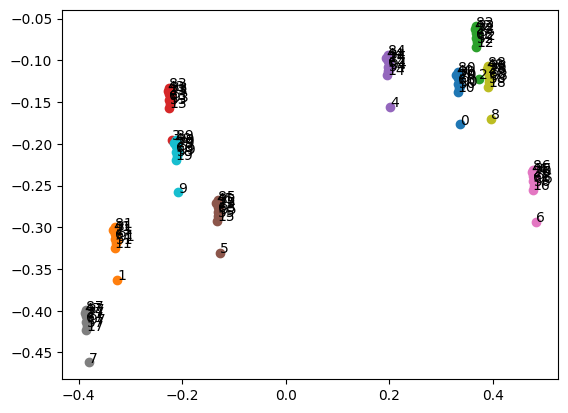

3/3 [==============================] - 0s 15ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0012 - val_mse: 0.0012
epoch  400
3/3 [==============================] - 0s 14ms/step - loss: 9.8761e-04 - mse: 9.8761e-04 - val_loss: 0.0012 - val_mse: 0.0012
epoch  401
3/3 [==============================] - 0s 13ms/step - loss: 9.4299e-04 - mse: 9.4299e-04 - val_loss: 0.0014 - val_mse: 0.0014
epoch  402
3/3 [==============================] - 0s 15ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0016 - val_mse: 0.0016
epoch  403
3/3 [==============================] - 0s 13ms/step - loss: 9.2895e-04 - mse: 9.2895e-04 - val_loss: 0.0013 - val_mse: 0.0013
epoch  404
3/3 [==============================] - 0s 14ms/step - loss: 9.7399e-04 - mse: 9.7399e-04 - val_loss: 0.0013 - val_mse: 0.0013
epoch  405
3/3 [==============================] - 0s 13ms/step - loss: 8.6338e-04 - mse: 8.6338e-04 - val_loss: 0.0015 - val_mse: 0.0015
epoch  406
3/3 [==============================] - 0s 13ms/step - los

3/3 [==============================] - 0s 15ms/step - loss: 4.3572e-04 - mse: 4.3572e-04 - val_loss: 4.1324e-04 - val_mse: 4.1324e-04
epoch  433
3/3 [==============================] - 0s 15ms/step - loss: 4.0928e-04 - mse: 4.0928e-04 - val_loss: 4.7110e-04 - val_mse: 4.7110e-04
epoch  434
3/3 [==============================] - 0s 14ms/step - loss: 3.7998e-04 - mse: 3.7998e-04 - val_loss: 4.6274e-04 - val_mse: 4.6274e-04
epoch  435
3/3 [==============================] - 0s 14ms/step - loss: 3.7904e-04 - mse: 3.7904e-04 - val_loss: 4.5561e-04 - val_mse: 4.5561e-04
epoch  436
3/3 [==============================] - 0s 14ms/step - loss: 3.9916e-04 - mse: 3.9916e-04 - val_loss: 3.7888e-04 - val_mse: 3.7888e-04
epoch  437
3/3 [==============================] - 0s 14ms/step - loss: 3.8351e-04 - mse: 3.8351e-04 - val_loss: 4.4439e-04 - val_mse: 4.4439e-04
epoch  438
3/3 [==============================] - 0s 13ms/step - loss: 3.9724e-04 - mse: 3.9724e-04 - val_loss: 4.3726e-04 - val_mse: 4.3726e

1/1 [==============================] - 0s 14ms/step


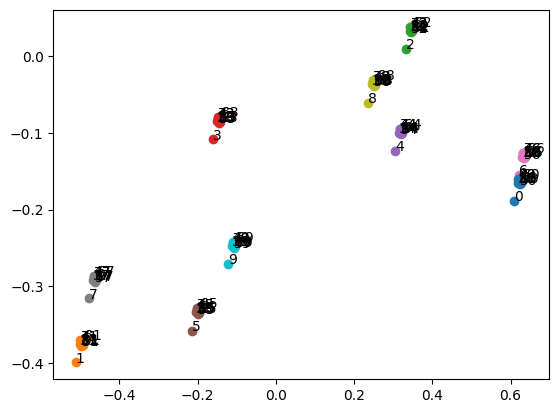

3/3 [==============================] - 0s 14ms/step - loss: 3.8561e-04 - mse: 3.8561e-04 - val_loss: 2.7479e-04 - val_mse: 2.7479e-04
epoch  450
3/3 [==============================] - 0s 13ms/step - loss: 3.2638e-04 - mse: 3.2638e-04 - val_loss: 3.5339e-04 - val_mse: 3.5339e-04
epoch  451
3/3 [==============================] - 0s 13ms/step - loss: 4.2749e-04 - mse: 4.2749e-04 - val_loss: 2.9655e-04 - val_mse: 2.9655e-04
epoch  452
3/3 [==============================] - 0s 14ms/step - loss: 3.5619e-04 - mse: 3.5619e-04 - val_loss: 4.8382e-04 - val_mse: 4.8382e-04
epoch  453
3/3 [==============================] - 0s 13ms/step - loss: 4.8210e-04 - mse: 4.8210e-04 - val_loss: 3.6005e-04 - val_mse: 3.6005e-04
epoch  454
3/3 [==============================] - 0s 14ms/step - loss: 3.5020e-04 - mse: 3.5020e-04 - val_loss: 3.9546e-04 - val_mse: 3.9546e-04
epoch  455
3/3 [==============================] - 0s 14ms/step - loss: 4.6921e-04 - mse: 4.6921e-04 - val_loss: 2.6617e-04 - val_mse: 2.6617e

epoch  482
3/3 [==============================] - 0s 14ms/step - loss: 2.9340e-04 - mse: 2.9340e-04 - val_loss: 4.5249e-04 - val_mse: 4.5249e-04
epoch  483
3/3 [==============================] - 0s 13ms/step - loss: 5.1244e-04 - mse: 5.1244e-04 - val_loss: 4.7775e-04 - val_mse: 4.7775e-04
epoch  484
3/3 [==============================] - 0s 13ms/step - loss: 3.4800e-04 - mse: 3.4800e-04 - val_loss: 1.6980e-04 - val_mse: 1.6980e-04
epoch  485
3/3 [==============================] - 0s 14ms/step - loss: 2.6179e-04 - mse: 2.6179e-04 - val_loss: 2.5127e-04 - val_mse: 2.5127e-04
epoch  486
3/3 [==============================] - 0s 13ms/step - loss: 4.0576e-04 - mse: 4.0576e-04 - val_loss: 1.8186e-04 - val_mse: 1.8186e-04
epoch  487
3/3 [==============================] - 0s 13ms/step - loss: 1.6049e-04 - mse: 1.6049e-04 - val_loss: 2.4172e-04 - val_mse: 2.4172e-04
epoch  488
3/3 [==============================] - 0s 13ms/step - loss: 2.4586e-04 - mse: 2.4586e-04 - val_loss: 2.2665e-04 - val_m

In [105]:
for epoch in range(500):
    if epoch%50 == 0:
        import random
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        for i in range(100):
            pred = word_model.predict([int_to_vec(i)])
            ax.scatter(pred[:,0], pred[:,1])
            ax.annotate(i, pred[0])
        plt.show()
    model.fit(X_train, word_model.predict(y_train), epochs=1, validation_data=(X_test, word_model.predict(y_test)))
    print("epoch ", epoch)

In [106]:
model.predict([0, 1, 6])

1/1 [==============================] - 0s 45ms/step


array([[-0.42778236, -0.20698753]], dtype=float32)

In [107]:
model.predict([0, 1, 7])

1/1 [==============================] - 0s 14ms/step


array([[ 0.21583594, -0.00484597]], dtype=float32)

In [108]:
word_model.predict([0, 1, 7])

1/1 [==============================] - 0s 13ms/step


array([[-0.42513955, -0.20400801]], dtype=float32)

In [109]:
word_model.predict([0, 1, 8])

1/1 [==============================] - 0s 14ms/step


array([[ 0.22552261, -0.02521682]], dtype=float32)

In [110]:
word_model.predict([[4, 5, 5], [3, 4, 2], [3, 4, 3]])

1/1 [==============================] - 0s 14ms/step


array([[-0.36118376, -0.4400253 ],
       [ 0.24151523, -0.01225682],
       [-0.32881707, -0.16947182]], dtype=float32)

1/1 [==============================] - 0s 13ms/step


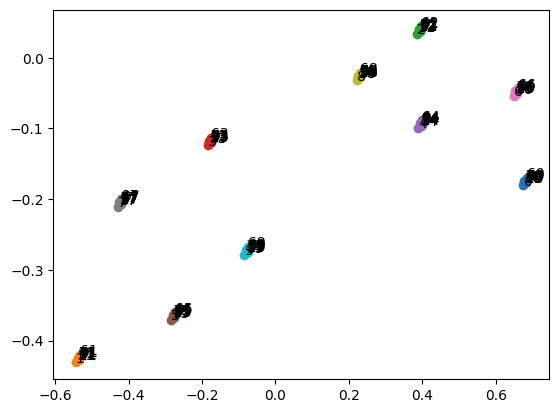

In [111]:
import random

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(100):
    pred = word_model.predict([int_to_vec(i)])
    ax.scatter(pred[:,0], pred[:,1])
    ax.annotate(i, pred[0])

In [112]:
for i in range(100):
    pred = word_model.predict([int_to_vec(i)])
    print(i, pred)

1/1 [==============================] - 0s 14ms/step
0 [[ 0.6738407 -0.180518 ]]
1/1 [==============================] - 0s 14ms/step
1 [[-0.5433562  -0.43085945]]
1/1 [==============================] - 0s 12ms/step
2 [[0.38568532 0.03346732]]
1/1 [==============================] - 0s 13ms/step
3 [[-0.18464701 -0.12374768]]
1/1 [==============================] - 0s 14ms/step
4 [[ 0.3892784  -0.09925905]]
1/1 [==============================] - 0s 13ms/step
5 [[-0.28420842 -0.37063414]]
1/1 [==============================] - 0s 13ms/step
6 [[ 0.6491652  -0.05395047]]
1/1 [==============================] - 0s 14ms/step
7 [[-0.42957395 -0.2106952 ]]
1/1 [==============================] - 0s 13ms/step
8 [[ 0.2210882  -0.03190404]]
1/1 [==============================] - 0s 13ms/step
9 [[-0.08474858 -0.27850628]]
1/1 [==============================] - 0s 13ms/step
10 [[ 0.6782751  -0.17383084]]
1/1 [==============================] - 0s 14ms/step
11 [[-0.5389217  -0.42417222]]
1/1 [=============

1/1 [==============================] - 0s 14ms/step
99 [[-0.07398786 -0.27005434]]


In [113]:
model.predict(np.array([[[9, 0, 0]]]))

1/1 [==============================] - 0s 8ms/step


array([[-0.41837645, -0.26604918]], dtype=float32)

In [114]:
word_model.predict(np.array([[[9, 0, 1]]]))

1/1 [==============================] - 0s 8ms/step


array([[-0.6033985 , -0.32441917]], dtype=float32)